In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
import math

In [2]:
df = pd.read_csv("1969999.csv")

In [3]:
df_v2 = df.drop(columns = ['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION'])
df_v2 = df_v2.dropna()

In [4]:
df_v3 = df_v2
df_v3['TEMP'] = df_v3['DATE'].str[0:7]
df_v3

,DATE,PRCP,TAVG,TMAX,TMIN,TEMP
1,2008-01-02,0.00,79,89.0,73.0,2008-01
11,2008-01-12,0.04,74,77.0,71.0,2008-01
12,2008-01-13,1.19,81,90.0,72.0,2008-01
13,2008-01-14,0.00,81,94.0,74.0,2008-01
15,2008-01-16,0.04,79,89.0,74.0,2008-01
...,...,...,...,...,...,...
6135,2016-12-08,0.24,82,89.0,76.0,2016-12
6136,2016-12-09,0.00,84,90.0,78.0,2016-12
6140,2016-12-13,1.18,80,84.0,76.0,2016-12
6144,2016-12-17,0.00,80,85.0,75.0,2016-12


In [5]:
df_v3 = df_v3.groupby('TEMP').mean()
df_v3.reset_index(level=0, inplace=True)
df_v3['Date'] = pd.to_datetime(df_v3['TEMP'], format='%Y-%m')
df_v3 = df_v3[['Date', 'PRCP', 'TAVG']]
df_v3
#df_v3['DATE'] = pd.to_datetime(df_v3['DATE'], format='%Y-%m-%d')

,Date,PRCP,TAVG
0,2008-01-01,0.142727,78.909091
1,2008-02-01,0.015000,78.250000
2,2008-03-01,0.220000,80.666667
3,2008-04-01,0.072500,83.500000
4,2008-05-01,0.620000,80.400000
...,...,...,...
101,2016-08-01,0.811724,83.206897
102,2016-09-01,0.581818,82.863636
103,2016-10-01,0.292258,83.161290
104,2016-11-01,0.169231,82.115385


In [6]:
#missing rows for 2010-02-01 and 2015-04-01; fill in using mean of nearest neighbours
df_fill= pd.DataFrame({"Date":["2010-02-01", "2015-04-01"], 
                    "PRCP":[0, 0.121572],
                      "TAVG":[81, 83.507143]})
df_fill['Date'] = pd.to_datetime(df_fill['Date'], format='%Y-%m-%d')
df_v3 = df_v3.append(df_fill, ignore_index = True)
df_v3 = df_v3.sort_values(by=['Date'])
df_v3 = df_v3.reset_index(drop = True)
df_v3

,Date,PRCP,TAVG
0,2008-01-01,0.142727,78.909091
1,2008-02-01,0.015000,78.250000
2,2008-03-01,0.220000,80.666667
3,2008-04-01,0.072500,83.500000
4,2008-05-01,0.620000,80.400000
...,...,...,...
103,2016-08-01,0.811724,83.206897
104,2016-09-01,0.581818,82.863636
105,2016-10-01,0.292258,83.161290
106,2016-11-01,0.169231,82.115385


-----------------

In [7]:
df2 = pd.read_csv("denguecases.csv")
df2 = df2[df2['Region'] == 'NCR']
df2

,Month,Year,Region,Dengue_Cases
1728,Jan,2008,NCR,12.037927
1729,Feb,2008,NCR,6.065511
1730,Mar,2008,NCR,8.500309
1731,Apr,2008,NCR,21.641057
1732,May,2008,NCR,16.255857
...,...,...,...,...
1831,Aug,2016,NCR,10.126983
1832,Sep,2016,NCR,9.900541
1833,Oct,2016,NCR,8.460119
1834,Nov,2016,NCR,7.541772


In [8]:
df2['Month'] = pd.factorize(df2.Month)[0] + 1
df2["Date"] = df2["Year"].map(str) + df2["Month"].map(str)
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y%m')
df2.reset_index(level=0, inplace=True)

In [9]:
df2 = df2[['Date', 'Dengue_Cases']]
df2

,Date,Dengue_Cases
0,2008-01-01,12.037927
1,2008-02-01,6.065511
2,2008-03-01,8.500309
3,2008-04-01,21.641057
4,2008-05-01,16.255857
...,...,...
103,2016-08-01,10.126983
104,2016-09-01,9.900541
105,2016-10-01,8.460119
106,2016-11-01,7.541772


-------------------------------

# Graphing

In [10]:
def plot_df(df2, x, y, title="", xlabel='Date', ylabel='Dengue Cases', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

C:\Users\amw\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


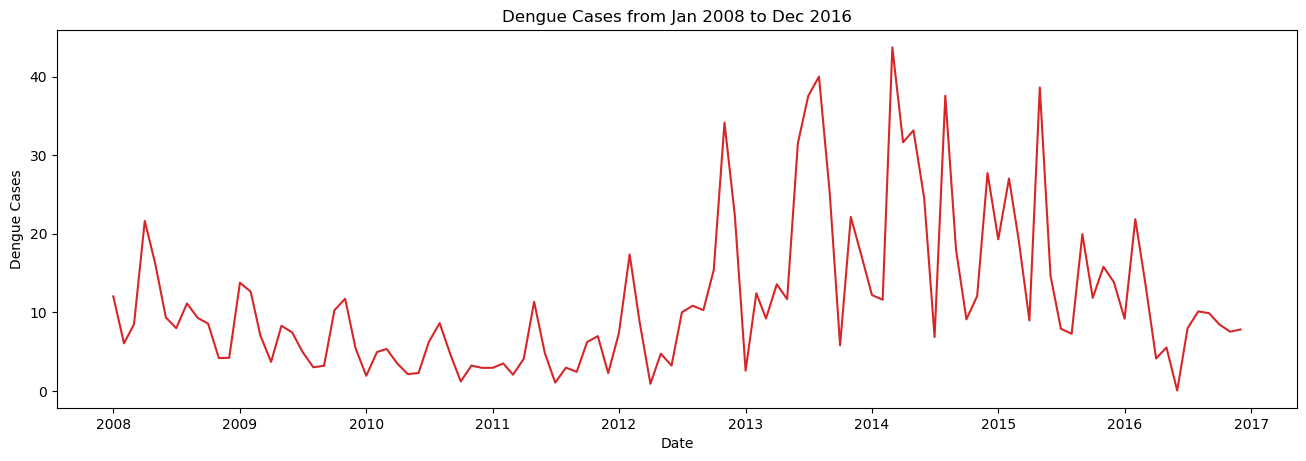

In [11]:
plot_df(df2, x=df2.Date, y=df2.Dengue_Cases, title='Dengue Cases from Jan 2008 to Dec 2016')   

C:\Users\amw\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\amw\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


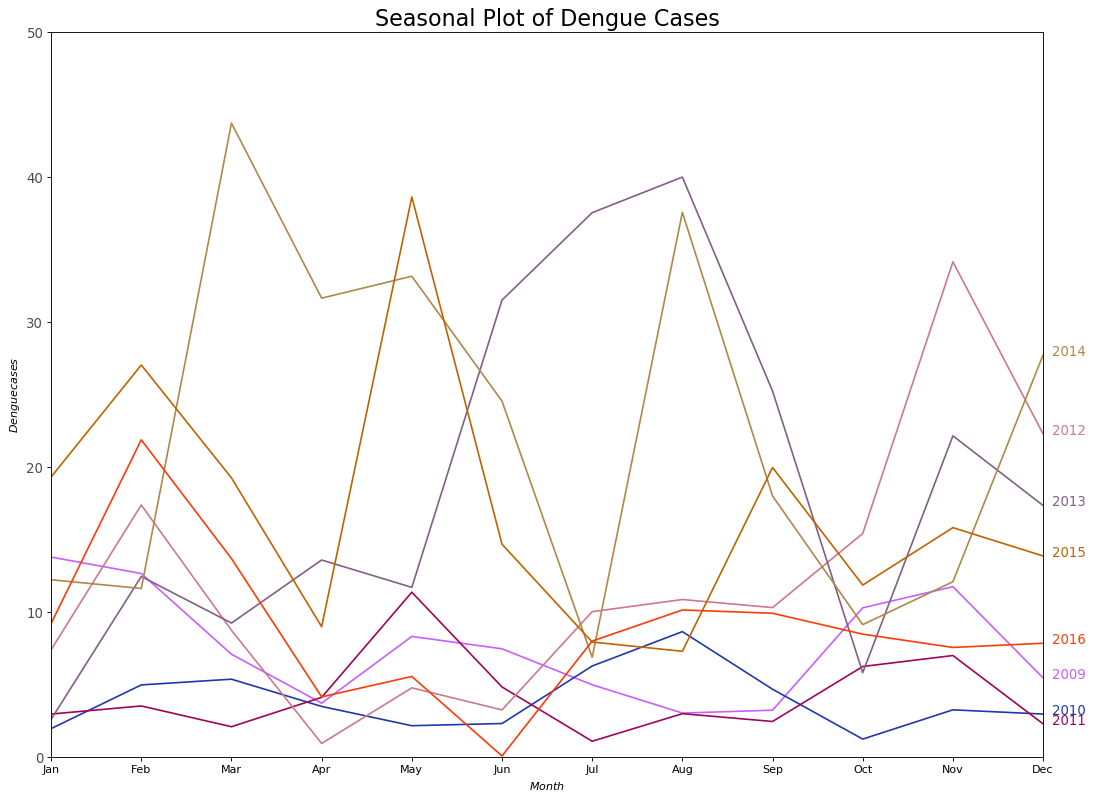

In [12]:
df2['year'] = [d.year for d in df2.Date]
df2['month'] = [d.strftime('%b') for d in df2.Date]
years = df2['year'].unique()

#Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

#Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'Dengue_Cases', data=df2.loc[df2.year==y, :], color=mycolors[i], label=y)
        plt.text(df2.loc[df2.year==y, :].shape[0]-.9, df2.loc[df2.year==y, 'Dengue_Cases'][-1:].values[0], y, fontsize=12, color=mycolors[i])

plt.gca().set(xlim=(0, 11), ylim=(0, 50), ylabel='$Dengue cases$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Dengue Cases", fontsize=20)
plt.show()

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
df2 = df2[['Date', 'Dengue_Cases']]
df2 = df2.set_index('Date')

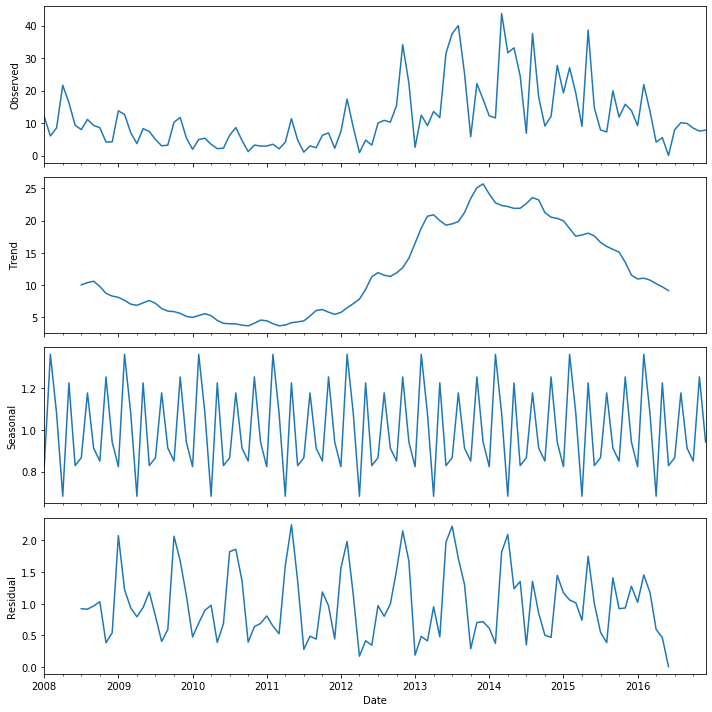

In [14]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df2['Dengue_Cases'], model='multiplicative')

# Additive Decomposition
result_add = seasonal_decompose(df2['Dengue_Cases'], model='additive')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('', fontsize=22)
plt.show()

In [15]:
df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
Date,,,,
2008-01-01,-3.058079,NaN,NaN,12.037927
2008-02-01,2.207091,NaN,NaN,6.065511
2008-03-01,1.917552,NaN,NaN,8.500309
2008-04-01,-2.906793,NaN,NaN,21.641057
2008-05-01,2.706220,NaN,NaN,16.255857


---------------

# Test for stationarity using Augmented Dickey Fuller test (ADH Test)

In [16]:
from statsmodels.tsa.stattools import adfuller, kpss
result = adfuller(df2.Dengue_Cases.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.8851091320731858
p-value: 0.7928366337253021
Critial Values:
   1%, -3.4989097606014496
Critial Values:
   5%, -2.891516256916761
Critial Values:
   10%, -2.5827604414827157


null hypothesis is the time series possesses a unit root and is non-stationary

if the P-Value in ADH test is less than the significance level (assume as 0.05), reject the null hypothesis

## 0.7928 > 0.05; series is not stationary

# Test for autocorrelation

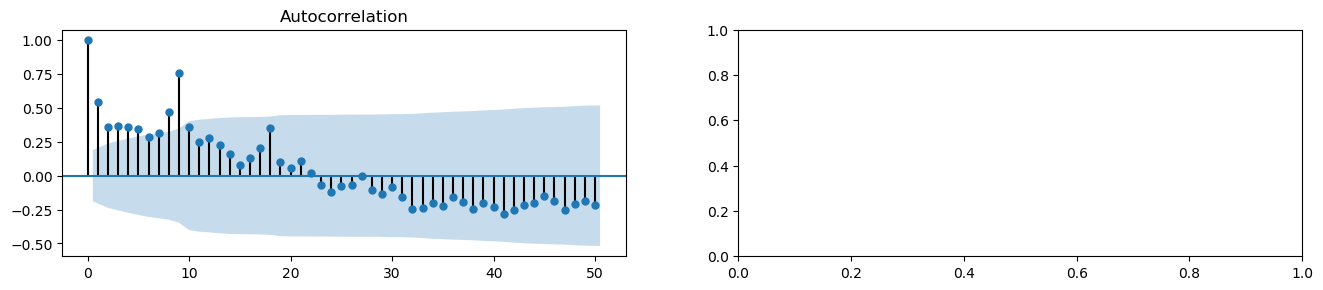

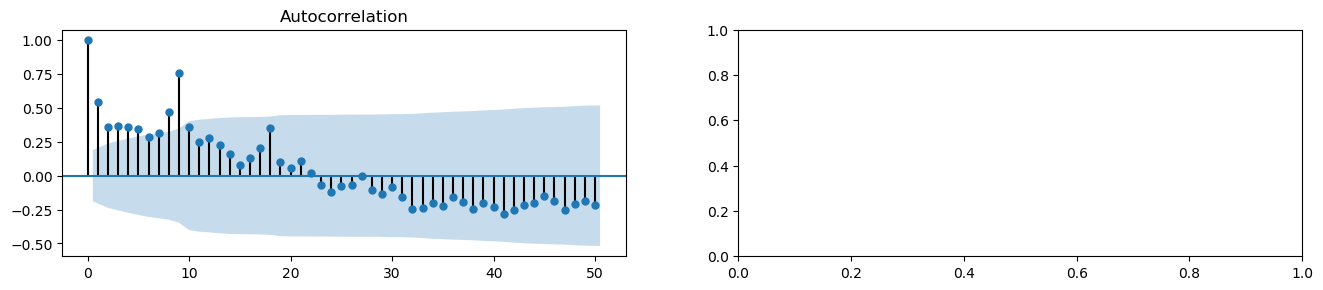

In [17]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df2.Dengue_Cases.tolist(), lags=50, ax=axes[0])

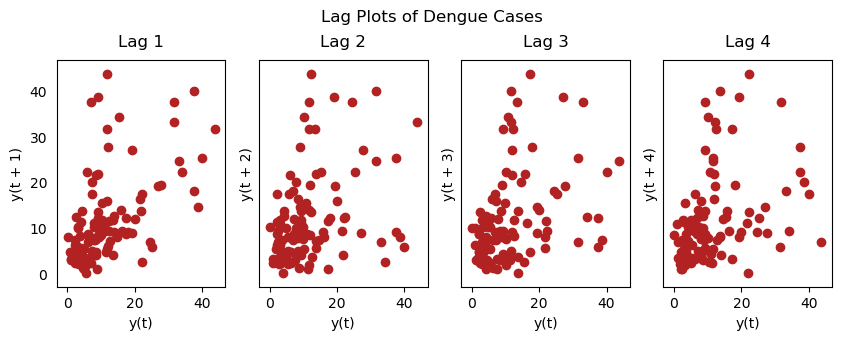

In [18]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df2.Dengue_Cases, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Dengue Cases', y=1.05)    
plt.show()

## series is not autocorrelated; most likely just white noise

----------

In [19]:
rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)

def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

print(ApEn(df2.Dengue_Cases, m=2, r=0.2*np.std(df2.Dengue_Cases)))

0.8002747988869365


## high approximate entropy; hard to forecast events

------------

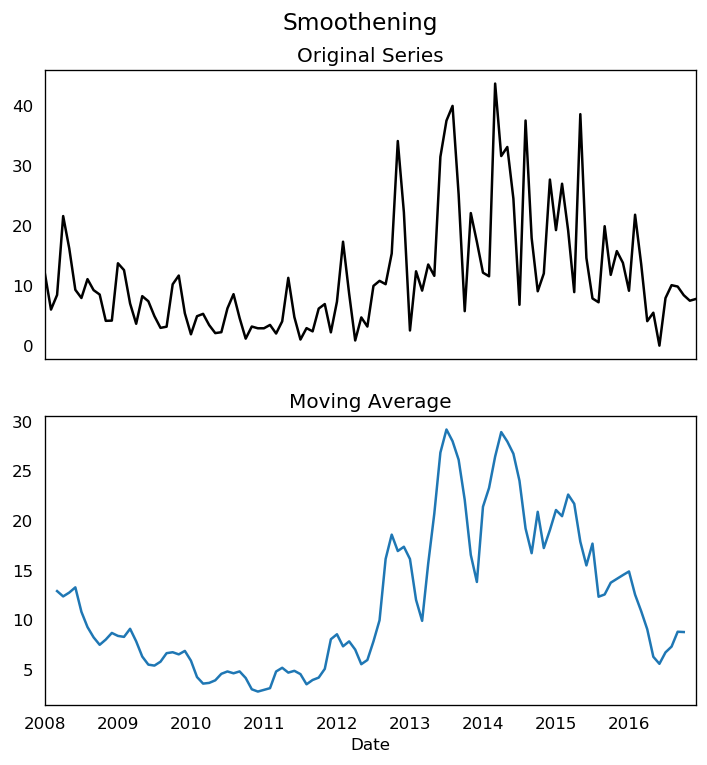

In [20]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})
# 1. Moving Average
df_ma = df2.Dengue_Cases.rolling(5, center=True, closed='both').mean()

# Plot
fig, axes = plt.subplots(2,1, figsize=(7, 7), sharex=True, dpi=120)
df2['Dengue_Cases'].plot(ax=axes[0], color='k', title='Original Series')
df_ma.plot(ax=axes[1], title='Moving Average')
fig.suptitle('Smoothening', y=0.95, fontsize=14)
plt.show()

Reducing the effect of noise in a signal get a fair approximation of the noise-filtered series.

The smoothed version of series can be used as a feature to explain the original series itself.

Visualize the underlying trend better

-----------

In [21]:
df2=df2.reset_index()
df2

,Date,Dengue_Cases
0,2008-01-01,12.037927
1,2008-02-01,6.065511
2,2008-03-01,8.500309
3,2008-04-01,21.641057
4,2008-05-01,16.255857
...,...,...
103,2016-08-01,10.126983
104,2016-09-01,9.900541
105,2016-10-01,8.460119
106,2016-11-01,7.541772


In [22]:
from statsmodels.tsa.stattools import grangercausalitytests
df2['month'] = df2.Date.dt.month
grangercausalitytests(df2[['Dengue_Cases', 'month']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0296  , p=0.3126  , df_denom=104, df_num=1
ssr based chi2 test:   chi2=1.0593  , p=0.3034  , df=1
likelihood ratio test: chi2=1.0541  , p=0.3046  , df=1
parameter F test:         F=1.0296  , p=0.3126  , df_denom=104, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0443  , p=0.3557  , df_denom=101, df_num=2
ssr based chi2 test:   chi2=2.1920  , p=0.3342  , df=2
likelihood ratio test: chi2=2.1697  , p=0.3380  , df=2
parameter F test:         F=1.0443  , p=0.3557  , df_denom=101, df_num=2


{1: ({'ssr_ftest': (1.0296195265488286, 0.3126029000794075, 104.0, 1),
   'ssr_chi2test': (1.0593200898146602, 0.30337030791554054, 1),
   'lrtest': (1.0541107102633305, 0.30456224930265496, 1),
   'params_ftest': (1.0296195265488288, 0.3126029000794075, 104.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.0443218731017294, 0.3556990153431282, 101.0, 2),
   'ssr_chi2test': (2.192041951461056, 0.3341982244303002, 2),
   'lrtest': (2.1696843373262027, 0.3379551215942329, 2),
   'params_ftest': (1.044321873101726, 0.355699015343132, 101.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [23]:
df2['PRCP'] = df_v3['PRCP'].values
df2['TAVG'] = df_v3['TAVG'].values
df3 = df2[['Date', 'Dengue_Cases', 'PRCP', 'TAVG']]
grangercausalitytests(df2[['Dengue_Cases', 'PRCP']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1507  , p=0.6987  , df_denom=104, df_num=1
ssr based chi2 test:   chi2=0.1550  , p=0.6938  , df=1
likelihood ratio test: chi2=0.1549  , p=0.6939  , df=1
parameter F test:         F=0.1507  , p=0.6987  , df_denom=104, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4563  , p=0.6349  , df_denom=101, df_num=2
ssr based chi2 test:   chi2=0.9579  , p=0.6194  , df=2
likelihood ratio test: chi2=0.9536  , p=0.6208  , df=2
parameter F test:         F=0.4563  , p=0.6349  , df_denom=101, df_num=2


{1: ({'ssr_ftest': (0.15069874206234535, 0.6986620012471192, 104.0, 1),
   'ssr_chi2test': (0.1550458211602976, 0.693759285604518, 1),
   'lrtest': (0.1549335968164769, 0.6938645278557241, 1),
   'params_ftest': (0.1506987420623251, 0.6986620012471303, 104.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.4563413309496871, 0.6348974348378458, 101.0, 2),
   'ssr_chi2test': (0.9578649718943928, 0.6194443044765531, 2),
   'lrtest': (0.9535630135844713, 0.620778150286131, 2),
   'params_ftest': (0.456341330949683, 0.6348974348378458, 101.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [24]:
grangercausalitytests(df2[['Dengue_Cases', 'TAVG']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0395  , p=0.8429  , df_denom=104, df_num=1
ssr based chi2 test:   chi2=0.0406  , p=0.8403  , df=1
likelihood ratio test: chi2=0.0406  , p=0.8403  , df=1
parameter F test:         F=0.0395  , p=0.8429  , df_denom=104, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0754  , p=0.9274  , df_denom=101, df_num=2
ssr based chi2 test:   chi2=0.1584  , p=0.9239  , df=2
likelihood ratio test: chi2=0.1582  , p=0.9239  , df=2
parameter F test:         F=0.0754  , p=0.9274  , df_denom=101, df_num=2


{1: ({'ssr_ftest': (0.03948577280718407, 0.8428773302140724, 104.0, 1),
   'ssr_chi2test': (0.04062478548431438, 0.8402639152298874, 1),
   'lrtest': (0.04061707541143278, 0.8402788697641885, 1),
   'params_ftest': (0.03948577280717538, 0.8428773302141178, 104.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.07544601817004676, 0.927381999552529, 101.0, 2),
   'ssr_chi2test': (0.15836193912920704, 0.923872716472517, 2),
   'lrtest': (0.15824376198838763, 0.9239273084034376, 2),
   'params_ftest': (0.07544601817004556, 0.927381999552529, 101.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

null hypothesis: the series in the second column, does not Granger cause the series in the first

if p-values are less than a significance level (assume 0.05) then you reject the null hypothesis and conclude that the said lag of X is indeed useful

## p values of all tests are greater than 0.05; month is not useful to forecast dengue cases in NCR

Links

https://stackoverflow.com/questions/20461165/how-to-convert-index-of-a-pandas-dataframe-into-a-column

https://stackoverflow.com/questions/39727560/parse-pandas-column-to-date-from-string-with-dashes

https://www.machinelearningplus.com/time-series/time-series-analysis-python/

https://stats.stackexchange.com/questions/101467/how-to-interpret-autocorrelation

https://www.dummies.com/programming/big-data/data-science/autocorrelation-plots-graphical-technique-for-statistical-data/

https://www.statisticshowto.datasciencecentral.com/granger-causality/

https://machinelearningmastery.com/difference-time-series-dataset-python/

https://www.quora.com/What-is-ARIMA

https://people.duke.edu/~rnau/411diff.htm

-----------

# ARIMA

In [25]:
df2

,Date,Dengue_Cases,month,PRCP,TAVG
0,2008-01-01,12.037927,1,0.142727,78.909091
1,2008-02-01,6.065511,2,0.015000,78.250000
2,2008-03-01,8.500309,3,0.220000,80.666667
3,2008-04-01,21.641057,4,0.072500,83.500000
4,2008-05-01,16.255857,5,0.620000,80.400000
...,...,...,...,...,...
103,2016-08-01,10.126983,8,0.811724,83.206897
104,2016-09-01,9.900541,9,0.581818,82.863636
105,2016-10-01,8.460119,10,0.292258,83.161290
106,2016-11-01,7.541772,11,0.169231,82.115385


In [26]:
df2 = df2[['Date', 'Dengue_Cases']]
df2 = df2.set_index('Date')

# Make time series stationary

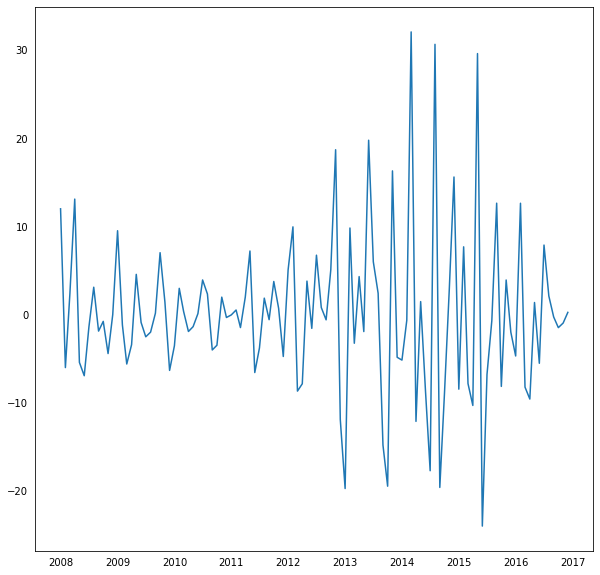

In [27]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
diff = df2.diff().fillna(df2['Dengue_Cases'].iloc[0])
pyplot.plot(diff)
pyplot.show()

In [28]:
diff

,Dengue_Cases
Date,
2008-01-01,12.037927
2008-02-01,-5.972416
2008-03-01,2.434798
2008-04-01,13.140748
2008-05-01,-5.385200
...,...
2016-08-01,2.144908
2016-09-01,-0.226442
2016-10-01,-1.440422


In [29]:
from statsmodels.tsa.stattools import adfuller, kpss
result = adfuller(diff.Dengue_Cases.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -4.651814459923951
p-value: 0.00010355692940491755
Critial Values:
   1%, -3.498198082189098
Critial Values:
   5%, -2.891208211860468
Critial Values:
   10%, -2.5825959973472097


null hypothesis is the time series possesses a unit root and is non-stationary

if the P-Value in ADH test is less than the significance level (assume as 0.05), reject the null hypothesis

# Model

In [30]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df2.Dengue_Cases, order=(2,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\amw\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\amw\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:        D2.Dengue_Cases   No. Observations:                  106
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -379.131
Method:                       css-mle   S.D. of innovations              8.409
Date:                Thu, 12 Dec 2019   AIC                            768.263
Time:                        13:44:26   BIC                            781.580
Sample:                    03-01-2008   HQIC                           773.660
                         - 12-01-2016                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0030      0.016     -0.191      0.849      -0.034       0.028
ar.L1.D2.Dengue_Cases    -0.3866      0.092     -4.214      0.000      -0.566      -0.207
ar.L2.D2

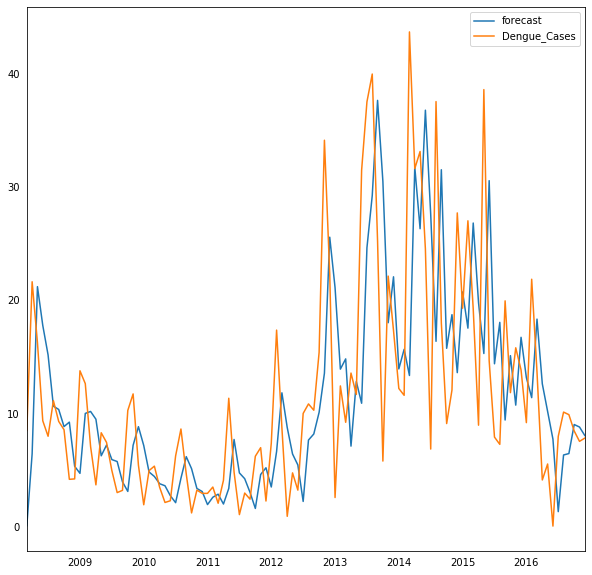

In [31]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [32]:
train = df2.Dengue_Cases[:76]
test = df2.Dengue_Cases[76:]

C:\Users\amw\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\amw\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


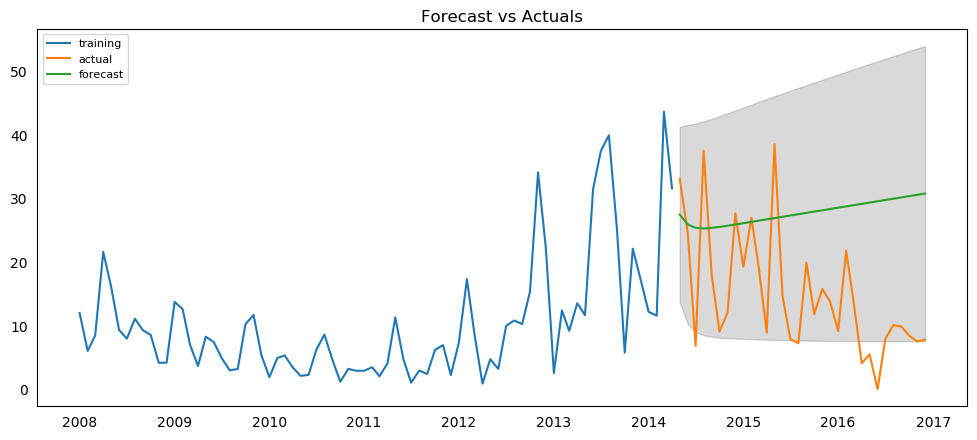

In [33]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(32, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [34]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

C:\Users\amw\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


{'mape': 17.835594763871526,
 'me': 12.844431164194088,
 'mae': 14.840208947569725,
 'mpe': 17.780267021856524,
 'rmse': 16.575966230670684,
 'acf1': 0.29634504517124055,
 'corr': -0.5109530576941089,
 'minmax': 0.5144393994101065}